<a href="https://colab.research.google.com/github/serg-kas/NN-archive/blob/main/%D0%90%D0%BF%D1%80%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_2020_Light_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_16_%D0%A1%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIGHT#

*Вариант 1*

Переписать ноутбук по распознаванию рукописных цифр своими руками, восстановив следующие операции:
1. Импорт библиотек.
2. Загрузка базы mnist.
3. Нормирование и преобразование x_train и y_train.
4. Создание сверточной нейронной сети.
5. Обучение сверточной нейронной сети.

Можно смотреть в ноутбук с занятия, но код писать самостоятельно.


In [ ]:
#Импорт библиотек (часть может потребоваться в задаче Pro)

# Датасеты
from tensorflow.keras.datasets import mnist #база mnist
from tensorflow.keras.datasets import cifar10 #база cifar10
from tensorflow.keras.datasets import cifar100 #база cifar100

# Сеть прямого распостанения и базовые слои в т.ч. для сверточных сетей
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adadelta #оптимизаторы
from tensorflow.keras import utils #отсюда to_categoricall

# Работа с изображениями
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
%matplotlib inline

#Для загрузки файла
from google.colab import files
import os

#Базовые библиотеки
import numpy as np
import matplotlib.pyplot as plt
import random
import math


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(60000, 28, 28)
(60000,)


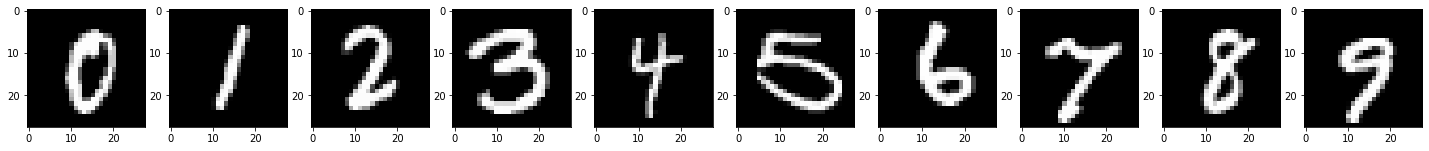

In [ ]:
# Загружаем MINST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Смотрим форму данных
print(x_train.shape)
print(y_train.shape)

#Выводим на экран пример картинок
fig, axs = plt.subplots(1, 10, figsize=(25,3)) #будет 10 графиков по числу классов от 0 до 9

for i in range(10):
  label_indexes = np.where(y_train == i)[0]
  #print(np.where(y_train == i))
  #print(label_indexes)
  index = random.choice(label_indexes) #случайный индекс из списка
  #print(index)
  img = x_train[index] #изображение по индексу
  axs[i].imshow(Image.fromarray(img), cmap='gray') 

plt.show()


In [ ]:
# Подготовим данные

y_train = utils.to_categorical(y_train, 10)  # в формат one_hot_encoding на 10 категорий
y_test = utils.to_categorical(y_test, 10)    # в формат one_hot_encoding на 10 категорий

#print(x_train.shape[0])
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  #добавляем размерность 1
#print(x_test.shape[0])
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)     #добавляем размерность 1

# Проверим форматы подготовленных выборок
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [ ]:
#Создаем  нейронную сеть (архитектура из вебиинара)

model = Sequential()

#слой пакетной нормализации - входной
model.add(BatchNormalization(input_shape=(28,28,1)))

#первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
#второй сверточный слой - идентичен первому сверточному слою
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))

#слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
#слой Dropout
model.add(Dropout(0.25))

#разворачиваем в вектор для перехода к полносвязным слоям 
model.add(Flatten())

#первый полносвязный слой
model.add(Dense(256, activation='relu'))
#слой Dropout
model.add(Dropout(0.25))

#второй - выходной полносвязный слой
model.add(Dense(10, activation='softmax'))


# Компилируем сеть
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Напечатаем архтектуру
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_7 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)             

Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.1481 - accuracy: 0.9541 - val_loss: 0.0433 - val_accuracy: 0.9857
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0502 - accuracy: 0.9839 - val_loss: 0.0323 - val_accuracy: 0.9903
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0343 - accuracy: 0.9894 - val_loss: 0.0301 - val_accuracy: 0.9895
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0301 - val_accuracy: 0.9899
Epoch 5/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0214 - accuracy: 0.9928 - val_loss: 0.0291 - val_accuracy: 0.9904
Epoch 6/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0188 - accuracy: 0.9937 - val_loss: 0.0318 - val_accuracy: 0.9914
Epoch 7/15
469/469 [==============================] - 2s 5ms/step - loss: 0.0156 - accuracy: 0.9946 - val_loss: 0.0354 - val_accuracy: 0.9907
Epoch 

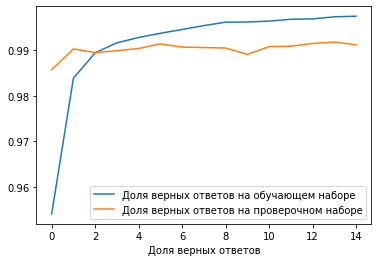

In [ ]:
#Обучаем сеть на подготовленных данных датасета

b_s =128

history = model.fit(x_train, y_train, batch_size=b_s, epochs=15,
                    validation_data=(x_test, y_test), verbose=1)


#и нарисуем график точности обучения
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.xlabel('Доля верных ответов')
plt.legend()
plt.show()




In [ ]:
#Проверим распознавание на произвольном примере из тестовой выборки
n = 1111

prediction = model.predict(x_test)
#print(type(prediction))
#print(type(prediction[n]))

#напечатаем результаты
print('Выход сети', prediction[n])
print('Распознанная цифра', np.argmax(prediction[n]))
print('Верный ответ', np.argmax(y_test[n]))


Выход сети [1.2738342e-22 2.6538660e-14 3.0328891e-16 6.5998828e-20 1.0000000e+00
 1.0873162e-17 6.3957340e-18 2.1225341e-12 2.1407618e-15 2.9451755e-10]
Распознанная цифра 4
Верный ответ 4


**На этом задание Light Вариант 1 закончено: библиотеки импортированы, датасет загружен, данные подготовлены,  сеть создана и обучена. Код честно писал вручную.**

#PRO#

*Вариант 3*

Добейтесь точности не менее 85% (в идеале 90%) на проверочной выборке на базе трех иномарок. Размер проверочной выборки - 20%.


In [ ]:
!unzip -q "/content/drive/My Drive/my_sample_data/Д.З.16/middle_fmr.zip" -d /content/cars 

In [ ]:
train_path = '/content/cars' #Здесь распакованы папки с картинками
batch_size = 25 #Размер выборки
img_width = 96 #Ширина изображения
img_height = 54 #Высота изображения

In [ ]:
#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, # Включаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    #НА ПРОВЕРОЧНУЮ ВЫБОРКУ ОТВЕЛИ 20% (было 10%)
    validation_split=0.2 
)

In [ ]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки. Разбиение выборки по маркам авто 
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.


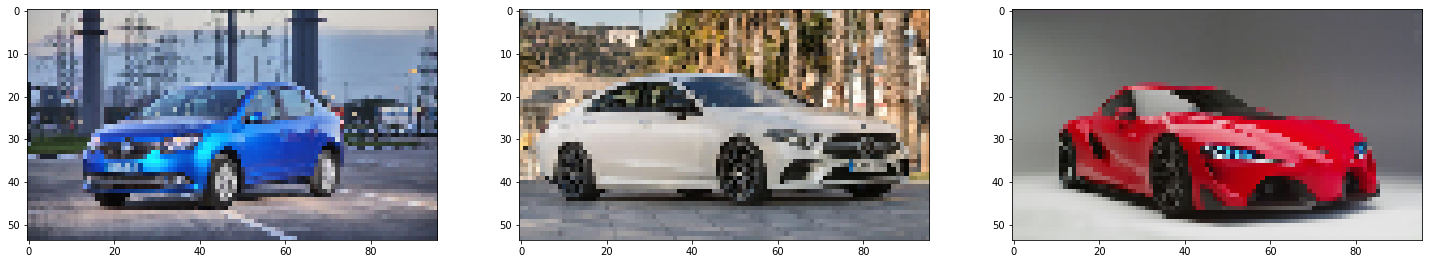

In [ ]:
#Выводим для примера картинки по каждому классу

fig, axs = plt.subplots(1, 3, figsize=(25, 5)) #Создаем полотно из 3 графиков
for i in range(3): #Проходим по всем классам
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии

plt.show() #Показываем изображения

In [ ]:
train_generator.class_indices

In [ ]:
#Создаем последовательную модель 
model = Sequential()

#Первый сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))

model.add(BatchNormalization())

#Второй сверточный слой
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Dropout(0.2))

#Третий сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

#model.add(Dropout(0.2))   

#Четвертый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Dropout(0.2)) 

#Пятый сверточный слой
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))

#model.add(Dropout(0.2))
model.add(BatchNormalization())

#Шестой сверточный слой
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(3, 3)))

#Слой регуляризации Dropout
model.add(Dropout(0.2))  






#Слой преобразования двумерных данных в одномерные 
model.add(Flatten())
#Полносвязный слой
model.add(Dense(2048, activation='relu'))

model.add(Dropout(0.3))

#Полносвязный слой
model.add(Dense(4096, activation='relu'))  

#model.add(Dropout(0.3))

#Выходной полносвязный слой
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy']) #было 0.0001

In [ ]:
#Если хочется перекомпилировать с меньшим шагом обучения
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.000001), metrics=['accuracy']) #было 0.0001

In [ ]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_278 (Conv2D)          (None, 96, 54, 256)       7168      
_________________________________________________________________
batch_normalization_70 (Batc (None, 96, 54, 256)       1024      
_________________________________________________________________
conv2d_279 (Conv2D)          (None, 96, 54, 256)       590080    
_________________________________________________________________
batch_normalization_71 (Batc (None, 96, 54, 256)       1024      
_________________________________________________________________
max_pooling2d_135 (MaxPoolin (None, 32, 18, 256)       0         
_________________________________________________________________
dropout_96 (Dropout)         (None, 32, 18, 256)       0         
_________________________________________________________________
conv2d_280 (Conv2D)          (None, 32, 18, 512)     

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=50,  #было 45
    verbose=1
)

Epoch 1/50
109/109 [==============================] - 10s 91ms/step - loss: 0.0101 - accuracy: 0.9982 - val_loss: 0.9183 - val_accuracy: 0.8415
Epoch 2/50
109/109 [==============================] - 10s 90ms/step - loss: 0.0078 - accuracy: 0.9960 - val_loss: 0.9358 - val_accuracy: 0.8385
Epoch 3/50
109/109 [==============================] - 10s 91ms/step - loss: 0.0099 - accuracy: 0.9963 - val_loss: 0.9389 - val_accuracy: 0.8400
Epoch 4/50
109/109 [==============================] - 10s 90ms/step - loss: 0.0086 - accuracy: 0.9967 - val_loss: 1.0109 - val_accuracy: 0.8178
Epoch 5/50
109/109 [==============================] - 10s 90ms/step - loss: 0.0095 - accuracy: 0.9978 - val_loss: 0.8865 - val_accuracy: 0.8341
Epoch 6/50
109/109 [==============================] - 10s 91ms/step - loss: 0.0065 - accuracy: 0.9971 - val_loss: 1.0237 - val_accuracy: 0.8267
Epoch 7/50
109/109 [==============================] - 10s 91ms/step - loss: 0.0101 - accuracy: 0.9971 - val_loss: 1.0293 - val_accuracy:

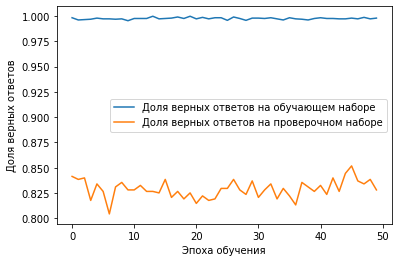

In [ ]:
#Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

**Проверочную выборку по условию  задачи сделал 20% (была 10%). Пробовал добавлять слои нормализации и dropout в разных  сочетаних. Обучал в несколько приемов по 50 эпох с разным шагом от 0.0001 и ниже. Достигнута точность 85%**